<a href="https://colab.research.google.com/github/Umeshpandey298/ml/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CUSTOMER CHURN PREDICTION**

**OBJECTIVE:-** To predict which custumer is pay the Bill Amount.

**IMPORT LIBRARY**

In [131]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [132]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**IMPORT DATA**


In [133]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/customer_churn_large_dataset.csv")
df.head()


,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [134]:
from matplotlib import pyplot as plt

In [135]:
x = df.drop('Churn',axis='columns')
x

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236
1,2,Customer_2,62,Female,New York,1,48.76,172
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460
3,4,Customer_4,36,Female,Miami,3,97.94,297
4,5,Customer_5,46,Female,Miami,19,58.14,266
...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226
99996,99997,Customer_99997,62,Female,New York,19,61.65,351
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251
99998,99999,Customer_99999,51,Female,New York,20,49.25,434


In [136]:
y=df[["Churn"]]

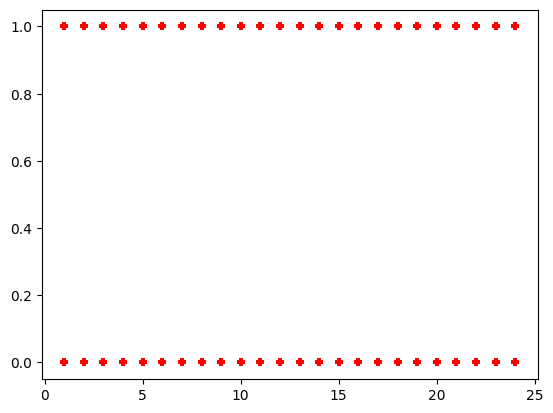

In [137]:
plt.scatter(df["Subscription_Length_Months"],y,marker='+',color='red')

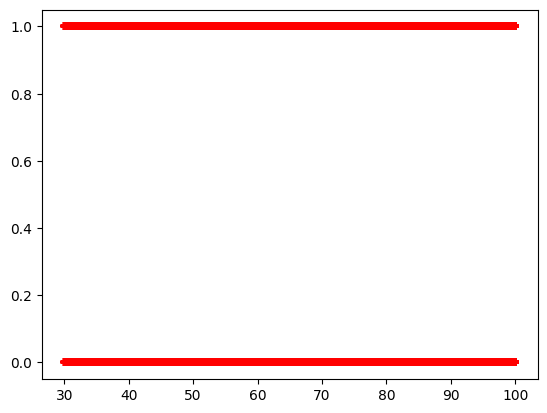

In [138]:
plt.scatter(df["Monthly_Bill"],y,marker='+',color='red')

**FEATURE ENGINEERING**




In [139]:
from sklearn.preprocessing import LabelEncoder
le_Location = LabelEncoder()
le_Gender = LabelEncoder()

In [140]:
x['Location_n'] = le_Location.fit_transform(x['Location'])
x['Gender_n'] = le_Gender.fit_transform(x['Gender'])
x

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Location_n,Gender_n
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,2,1
1,2,Customer_2,62,Female,New York,1,48.76,172,4,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,2,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,3,0
4,5,Customer_5,46,Female,Miami,19,58.14,266,3,0
...,...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,4,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,0,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,4,0


In [141]:
x_n=x.drop(["CustomerID","Name","Gender","Location"],axis='columns')
x_n

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Location_n,Gender_n
0,63,17,73.36,236,2,1
1,62,1,48.76,172,4,0
2,24,5,85.47,460,2,0
3,36,3,97.94,297,3,0
4,46,19,58.14,266,3,0
...,...,...,...,...,...,...
99995,33,23,55.13,226,1,1
99996,62,19,61.65,351,4,0
99997,64,17,96.11,251,0,1
99998,51,20,49.25,434,4,0


In [142]:
from sklearn.model_selection import train_test_split

In [143]:
X_train, X_test, y_train, y_test = train_test_split(x_n,y,train_size=0.8)

**MODEL BUILDING**

Logistic Regression Algorithem

In [144]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [145]:
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [146]:
y_predicted = model.predict(X_test)

In [147]:
model.predict(X_test)

array([1, 0, 1, ..., 0, 1, 0])

In [148]:
X_test

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Location_n,Gender_n
28675,59,14,61.04,106,4,1
21130,46,12,87.26,355,1,1
76808,45,4,50.98,96,2,1
55418,54,24,51.16,432,3,0
32719,36,8,54.73,334,1,0
...,...,...,...,...,...,...
92647,60,18,50.15,478,3,0
49345,69,11,60.09,410,0,1
31680,59,16,30.42,459,3,0
13470,31,16,54.90,194,4,1


In [149]:
model.score(X_test,y_test)

0.5034

Decision Tree Algorithem

In [150]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [151]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [152]:
model.score(X_test,y_test)

0.50545

Random Forest Algorithem

In [153]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)

<ipython-input-153-a9b66d4a91ca>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=20)

In [154]:
y_predicted = model.predict(X_test)

In [155]:
model.score(X_test, y_test)

0.49645

**MODEL OPTIMIZATION**

In [156]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [157]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [158]:
from sklearn.model_selection import cross_val_score

In [159]:
cross_val_score(LogisticRegression(),x_n,y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

array([0.49725, 0.5052 , 0.50135, 0.4982 , 0.5037 ])

In [160]:
scores1 = cross_val_score(RandomForestClassifier(n_estimators=40),x_n,y, cv=10)
np.average(scores1)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

0.50226

In [161]:
cross_val_score(tree.DecisionTreeClassifier(),x_n,y)

array([0.49945, 0.5005 , 0.4966 , 0.4974 , 0.502  ])

**EXPLANATION:-** In this assignment I have make the machine learning model to predict the the churn of those customer who is paid the bill amount or not.I likely use the many machine learning algorithm in this model like logistic regression,Decision tree and Random forest.The most  accurate predicted result is by using the decision Tree algorithm (the accuracy is about 100%)